<a href="https://colab.research.google.com/github/abekek/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks/blob/main/notebooks/benchmarking/Hysteresis_Loops_TRCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization Code (code)

### Mounting Google Drive (code)

In [ ]:
# if running on collaboratory set = True
collaboratory = True

if collaboratory:
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    print('Running on local systems, if running on collaboratory please change above')

Mounted at /content/drive


In [ ]:
# changes directory to your main google drive folder
%cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
# Checks if the directory exists
import os
if os.path.exists("./Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks"):
    pass
else:
    !git clone https://github.com/abekek/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks

In [ ]:
# moves to the right directory
%cd Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks

/content/drive/My Drive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks


In [ ]:
# checks if the directory is up to date
!git pull

Updating 52b267f..8306052
error: Your local changes to the following files would be overwritten by merge:
	Trained Models/SHO Fitting/model_AdaHessian.pt
Please commit your changes or stash them before you merge.
error: The following untracked working tree files would be overwritten by merge:
	Trained Models/SHO Fitting/model_AdaHessian_noise_2.0_bs128.pt
	Trained Models/SHO Fitting/model_AdaHessian_noise_4.0_bs128.pt
	Trained Models/SHO Fitting/model_AdaHessian_noise_7.0_bs128.pt
Please move or remove them before you merge.
Aborting


### Installing Packages (code)

In [ ]:
# Installs all of the requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 121 kB 29.0 MB/s 
     |████████████████████████████████| 147 kB 56.9 MB/s 
     |████████████████████████████████| 178 kB 67.0 MB/s 
     |████████████████████████████████| 242 kB 70.7 MB/s 
     |████████████████████████████████| 14.8 MB 56.2 MB/s 
     |████████████████████████████████| 2.2 MB 52.7 MB/s 
     |████████████████████████████████| 97 kB 7.7 MB/s 
     |████████████████████████████████| 41 kB 343 kB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 279 kB 71.3 MB/s 
     |████████████████████████████████| 61 kB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 136 kB 61.1 MB/s 
     |████████████████████████

In [ ]:
# installing PyTorch's Nightly version
!pip install --pre torch torchvision -f https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html -U

!pip install pycroscopy==0.60.7

if os.path.exists("./BGlib"):
    pass
else:
    !git clone https://github.com/pycroscopy/BGlib.git
    %cd BGlib/
    !git tag -l
    !git checkout 0.0.3
    !git branch -D master
    !git checkout -b master
    %cd ..

# downgrading the h5py version
!pip install 'h5py==2.10.0' --force-reinstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycroscopy-0.60.7-py2.py3-none-any.whl (354 kB)
     |████████████████████████████████| 95 kB 3.1 MB/s 
     |████████████████████████████████| 793 kB 26.6 MB/s 
  Using cached pyUSID-0.0.10-py2.py3-none-any.whl (66 kB)
     |████████████████████████████████| 51 kB 256 kB/s 
  Using cached numpy_groupies-0.9.7.tar.gz (22 kB)
     |████████████████████████████████| 381 kB 29.9 MB/s 
     |████████████████████████████████| 1.6 MB 52.6 MB/s 
     |████████████████████████████████| 837 kB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 54.7 MB/s 
     |████████████████████████████████| 596 kB 58.1 MB/s 
     |████████████████████████████████| 140 kB 59.3 MB/s 
  Created wheel for numpy-gro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
     |████████████████████████████████| 15.7 MB 16.7 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ip

### Importing Packages (code)

In [ ]:
import gdown
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numba import jit
import random
import time
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
import argparse
import seaborn as sns
from scipy.signal import resample
from scipy import fftpack
from scipy import io
from scipy import special
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.layers import (Attention, Dense, Conv1D, Convolution2D, 
                                     GRU, LSTM, Bidirectional, TimeDistributed,
                                     Dropout, Flatten, LayerNormalization, 
                                     RepeatVector, Reshape, MaxPooling1D, 
                                     UpSampling1D, BatchNormalization, Activation)
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from multiprocessing import Pool, Process
import multiprocessing as mp
from moviepy.editor import *
import glob
from sklearn.metrics import mean_squared_error
import gc
import sidpy
from BGlib.BGlib import be as belib
 
# set up notebook to show plots within the notebook
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch

# Import necessary libraries:
# General utilities:
import sys
import os
import gc

# Computation:
import numpy as np
import h5py
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid

# Finally, pycroscopy itself
sys.path.append('../../../')
import pyUSID as usid
from codes.util.preprocessing_global_standard_scaler import global_standard_scaler
from sidpy.hdf.hdf_utils import write_simple_attrs, get_attr
from pyUSID.io.hdf_utils import create_results_group, write_main_dataset, write_reduced_anc_dsets, create_empty_dataset, reshape_to_n_dims, get_auxiliary_datasets
from pyUSID.io.usi_data import USIDataset
from pyUSID.io import Dimension

from codes.util.file import print_tree
from codes.util.core import SHO_fit_func_torch, loop_fitting_function, loop_fitting_function_tf, computeDotProducts, normOfVar, fit_loop_function, computeTime, conventional_fit_loop_function
from codes.viz.plot import plot_best_worst_SHO, make_movie, plot_best_worst_loops, plot_reconstruction_comparison_SHO, plot_reconstruction_comparison_loops
from codes.util.postprocessing import transform_params, convert_real_imag
from codes.util.preprocessing_global_scaler import global_scaler
from codes.processing.filters import range_filter, clean_interpolate, interpolate_missing_points
from codes.algorithm.TRPCGOptimizerv2 import TRPCGOptimizerv2
from codes.algorithm.AdaHessian import AdaHessian

import numpy.lib.recfunctions as rfn

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1949696/45929032 bytes (4.2%)4161536/45929032 bytes (9.1%)7200768/45929032 bytes (15.7%)9904128/45929032 bytes (21.6%)12058624/45929032 bytes (26.3%)14663680/45929032 bytes (31.9%)17121280/45929032 bytes (37.3%)19537920/45929032 bytes (42.5%)22274048/45929032 bytes (48.5%)24715264/45929032 bytes (53.8%)27639808/45929032 bytes (60.2%)29777920/45929032 bytes (64.8%)321

### Setting Defaults (code)

In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
# shows the GPU that is available and the resources
!nvidia-smi

Tue Jul 19 17:32:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Loading data for SHO fitting (code)

In [ ]:
#TODO place this file on Zenodo before publication 
# downloads the original experiment file
gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2
To: /content/drive/MyDrive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks/data_file.h5
100%|██████████| 1.80G/1.80G [00:20<00:00, 87.8MB/s]


'data_file.h5'

In [ ]:
# Opens the translated file
h5_f = h5py.File('./data_file.h5', 'r+')

#Inspects the h5 file
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [ ]:
print('Datasets and datagroups within the file:\n------------------------------------')
print_tree(h5_f.file)
 
print('\nThe main dataset:\n------------------------------------')
print(h5_f)
print('\nThe ancillary datasets:\n------------------------------------')
print(h5_f.file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Position_Values'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Values'])

print('\nMetadata or attributes in a datagroup\n------------------------------------')
for key in h5_f.file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, h5_f.file['/Measurement_000'].attrs[key]))

Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurement_000/Channel_000/Bin_FFT
/Measurement_000/Channel_000/Bin_Frequencies
/Measurement_000/Channel_000/Bin_Indices
/Measurement_000/Channel_000/Bin_Step
/Measurement_000/Channel_000/Bin_Wfm_Type
/Measurement_000/Channel_000/Excitation_Waveform
/Measurement_000/Channel_000/Noise_Floor
/Measurement_000/Channel_000/Position_Indices
/Measurement_000/Channel_000/Position_Values
/Measurement_000/Channel_000/Raw_Data
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Indices
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_fit_positions
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_guess_positions

In [ ]:
# This sets the cores for computing the conventional fits.
# Data included has been fit with this method. 

# Maximum memory to use, in Mbs. Default = 1024
max_mem = 1024 * 8 

# Number of logical cores to use in fitting.  None uses all but 2 available cores.
max_cores = None 

# Note that if you set this to True, visualization is unlikely to work!
results_to_new_file = False

# Main Part

In [ ]:
if os.path.exists("./Trained Models/Piezoresponse"):
    pass
else:
    os.makedirs("Trained Models/Piezoresponse")

## Extracting Constants

In [ ]:
# number of samples per SHO fit
num_bins = h5_f['Measurement_000'].attrs['num_bins'] 

# number of pixels in the image
num_pix = h5_f['Measurement_000'].attrs['num_pix'] 

# number of pixels in x and y dimensions
num_pix_1d = int(np.sqrt(num_pix)) 

# number of DC voltage steps 
voltage_steps = h5_f['Measurement_000'].attrs['num_udvs_steps']

# sampling rate
sampling_rate = h5_f['Measurement_000'].attrs['IO_rate_[Hz]']

# BE bandwidth
be_bandwidth = h5_f['Measurement_000'].attrs['BE_band_width_[Hz]']

# BE center frequency
be_center_frequency = h5_f['Measurement_000'].attrs['BE_center_frequency_[Hz]']

# Frequency Vector in Hz
frequency_bin = h5_f['Measurement_000']['Channel_000']['Bin_Frequencies'][:]

# Resampled frequency vector
wvec_freq = resample(frequency_bin, 80)

In [ ]:
# get raw data (real and imaginary combined)
raw_data = h5_f['Measurement_000']['Channel_000']['Raw_Data']
raw_data_resampled = resample(np.array(raw_data).reshape(-1 , 165), 80, axis=1)

In [ ]:
# extracting the excitation waveform
be_waveform = h5_f['Measurement_000']['Channel_000']['Excitation_Waveform']

# extracting spectroscopic values
spectroscopic_values = h5_f['Measurement_000']['Channel_000']['Spectroscopic_Values']

In [ ]:
h5_main = h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess']
h5_loop_fit, h5_loop_group = fit_loop_function(h5_f, h5_main)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess-Loop_Fit_000" (7 members)>]
Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If

In [ ]:
proj_nd_shifted = conventional_fit_loop_function(h5_f)

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values


In [ ]:
# getting parameters for the hysteresis loops
params = np.zeros((num_pix, 9))
params_names = ['a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'b_0', 'b_1', 'b_2', 'b_3']

for i in range(9):
  params[:, i] = np.array(h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess-Loop_Fit_000']['Fit'][params_names[i]][:, 3])

In [ ]:
# voltage vector
V = np.swapaxes(np.atleast_2d(h5_f['Measurement_000']['Channel_000']['UDVS'][::2][:, 1][24:120]), 0, 1).astype(np.float64)

# to set up a type of loop_fitting function to use. Possible options: ['9 parameters', '13 parameters']
func_type = '9 parameters'

In [ ]:
# creating fits from fitting function and preparing for visualization
loop_fit_results = np.reshape(loop_fitting_function(func_type, V, params), (96, num_pix_1d, num_pix_1d))
proj_nd_shifted_transposed = np.transpose(proj_nd_shifted,(1,0,2,3))

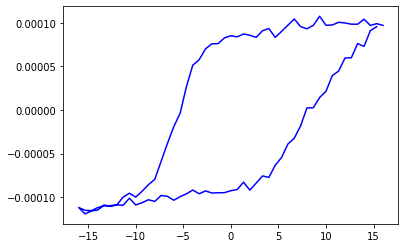

In [ ]:
i = np.random.randint(0,num_pix_1d,2)
plt.plot(V, proj_nd_shifted_transposed[i[0], i[1], :, 3],'blue')

## Data Preprocessing

In [ ]:
real_loops = clean_interpolate(proj_nd_shifted_transposed[:, :, :, 3].reshape(num_pix,-1)).astype(np.float64)

real_loops_scaler = global_scaler()

real_scaled_loops = real_loops_scaler.fit_transform(real_loops).astype(np.float64)

In [ ]:
real_parms_scaler = StandardScaler()
real_parms_scaled = real_parms_scaler.fit_transform(params)

In [ ]:
params_mean = real_parms_scaler.mean_
params_std = np.sqrt(real_parms_scaler.var_)

data_mean = real_loops_scaler.mean.astype(np.float64)
data_std = real_loops_scaler.std.astype(np.float64)

## Neural Network Architecture

In [ ]:
class TRPCGOptimizerv2:

    cgopttol = 1e-7
    c0tr = 0.2
    c1tr = 0.25
    c2tr = 0.75  # when to accept
    t1tr = 0.75
    t2tr = 2.0
    radius_max = 5.0  # max radius
    radius_initial = 1.0
    radius = radius_initial

    @tf.function
    def computeHessianProduct(self, x, y, v):
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                out = self.model(x)
                loss = tf.keras.losses.mean_squared_error(out, y)
                loss = tf.reduce_mean(loss)
            grad = tape2.gradient(loss, self.model.trainable_variables)

            gradSum = tf.reduce_sum([tf.reduce_sum(g*p0i)
                                     for g, p0i in zip(grad, v)])
        Hp = tape.gradient(gradSum, self.model.trainable_variables)
        return Hp

    def __init__(self, model, radius, precondition,
                 cgopttol=1e-7, c0tr=0.0001, c1tr=0.1, c2tr=0.75, t1tr=0.25, t2tr=2.0, radius_max=2.0,
                 radius_initial=0.1):

        self.model = model
        self.cgopttol = cgopttol
        self.c0tr = c0tr
        self.c1tr = c1tr
        self.c2tr = c2tr
        self.t1tr = t1tr
        self.t2tr = t2tr
        self.radius_max = radius_max
        self.radius_initial = radius_initial
        self.radius = radius
        self.cgmaxiter = sum([tf.size(w).numpy()
                              for w in self.model.trainable_weights])
        self.d = self.cgmaxiter
        self.cgmaxiter = min(120, self.cgmaxiter)
        self.iterationCounterForAdamTypePreconditioning = 0
        self.precondition = precondition
        if self.precondition != 0:
            self.DiagPrecond = [w.data*0.0 for w in self.model.parameters()]
            self.DiagScale = 0.0

    def findroot(self, x, p):
        aa = 0.0
        bb = 0.0
        cc = 0.0
        for e in range(len(x)):
            aa += tf.reduce_sum(p[e]*p[e])
            bb += tf.reduce_sum(p[e]*x[e])
            cc += tf.reduce_sum(x[e]*x[e])
        bb = bb*2.0
        cc = cc - self.radius**2
        alpha = (-2.0*cc)/(bb + tf.sqrt(bb**2-(4.0*aa*cc)))

        return alpha

    def computeListNorm(self, lst):
        return np.sum([tf.reduce_sum(ri*ri) for ri in lst])**0.5

    def computeListNormSq(self, lst):
        return np.sum([tf.reduce_sum(ri*ri) for ri in lst])

    def computeDotProducts(self, u, v):
        return tf.reduce_sum(tf.stack([tf.reduce_sum(ui * vi) for ui, vi in zip(u, v)], 0))

    def normOfVar(self, x):
        return tf.sqrt(self.computeDotProducts(x, x))

    def CGSolver(self, loss_grad, x, y):
        cg_iter = 0  # iteration counter
        x0 = [w.numpy()*0.0 for w in self.model.trainable_weights]
        if self.precondition == 0:
            r0 = [i+0.0 for i in loss_grad]  # set initial residual to gradient
            normGrad = self.normOfVar(r0)
            # set initial conjugate direction to -r0
            p0 = [-i+0.0 for i in loss_grad]
            self.cgopttol = self.computeListNormSq(loss_grad)
            self.cgopttol = self.cgopttol**0.5
            self.cgopttol = (min(0.5, self.cgopttol**0.5))*self.cgopttol
        else:
            r0 = [(i.data+0.0)*pr.data for i,
                  pr in zip(loss_grad, self.SquaredPreconditioner)]
            p0 = [-(i.data+0.0)*pr.data for i,
                  pr in zip(loss_grad, self.SquaredPreconditioner)]
            self.cgopttol = self.computeListNormSq(r0)
            self.cgopttol = self.cgopttol.data.item()**0.5
            self.cgopttol = (min(0.5, self.cgopttol**0.5))*self.cgopttol

        cg_term = 0
        j = 0

        while 1:
            j += 1
            self.CG_STEPS_TOOK = j
            # if CG does not solve model within max allowable iterations
            if j > self.cgmaxiter:
                j = j-1
                p1 = x0
                print('\n\nCG has issues !!!\n\n')
                break
            # hessian vector product
            if self.precondition == 0:
                Hp = self.computeHessianProduct(x, y, p0)
            else:
                loss_grad_direct \
                    = np.sum([(gi*(si*pr.data)).sum() for gi, si, pr in zip(loss_grad, p0, self.SquaredPreconditioner)])
                Hp = torch.autograd.grad(loss_grad_direct, self.model.parameters(
                ), retain_graph=True)  # hessian-vector in tuple
                Hp = [g*pr.data for g,
                      pr in zip(Hp, self.SquaredPreconditioner)]

            pHp = tf.reduce_sum([tf.reduce_sum(Hpi*p0i)
                                 for Hpi, p0i in zip(Hp, p0)])

            # if nonpositive curvature detected, go for the boundary of trust region
            if pHp <= 0:
                tau = self.findroot(x0, p0)
                p1 = [xi+tau*p0i for xi, p0i in zip(x0, p0)]
                cg_term = 1
                break

            # if positive curvature
            # vector product
            rr0 = self.computeListNormSq(r0)
            # update alpha
            alpha = (rr0/pHp)

            x1 = [xi+alpha*pi for xi, pi in zip(x0, p0)]
            norm_x1 = self.computeListNorm(x1)

            if norm_x1 >= self.radius:
                tau = self.findroot(x0, p0)

                p1 = [xi+tau*pi for xi, pi in zip(x0, p0)]
                cg_term = 2
                break

            # update residual
            r1 = [ri+alpha*Hpi for ri, Hpi in zip(r0, Hp)]
            norm_r1 = self.computeListNorm(r1)

            if norm_r1 < self.cgopttol:
                p1 = x1
                cg_term = 3
                break

            rr1 = self.computeListNormSq(r1)
            beta = (rr1/rr0)

            # update conjugate direction for next iterate
            p1 = [-ri+beta*pi for ri, pi in zip(r1, p0)]

            p0 = p1
            x0 = x1
            r0 = r1

        cg_iter = j
        if self.precondition != 0:
            p1 = [pi*pr.data for pi, pr in zip(p1, self.SquaredPreconditioner)]

        d = p1

        return d, cg_iter, cg_term

    def assignToModel(self, newX):
        for w, nw in zip(self.model.trainable_weights, newX):
            w.assign(nw)

    def addToModel(self, d):
        for w, di in zip(self.model.trainable_weights, d):
            w.assign_add(di)

    def computeLoss(self, x, y):
        out = self.model(x)
        loss = tf.keras.losses.mean_squared_error(out, y)
        loss = tf.reduce_mean(loss)
        return loss

    def computeLossAndGrad(self, x, y):
        with tf.GradientTape() as tape:
            loss = self.computeLoss(x, y)
        grad = tape.gradient(loss, self.model.trainable_variables)
        return loss, grad

    def step(self, x, y):

        loss, grad = self.computeLossAndGrad(x, y)
        w0 = [w.numpy()+0.0 for w in self.model.trainable_weights]
        update = 3

        while update == 3:
            update = 2
            # Conjugate Gradient Method

            d, cg_iter, cg_term = self.CGSolver(grad, x, y)
            Hd = self.computeHessianProduct(x, y, d)
            dHd = tf.reduce_sum([tf.reduce_sum(Hdi*di)
                                 for Hdi, di in zip(Hd, d)])
            gd = tf.reduce_sum([tf.reduce_sum(gi*di)
                                for gi, di in zip(grad, d)])
            norm_d = self.computeListNorm(d)

            denominator = -gd - 0.5*(dHd)
            self.addToModel(d)
            loss_new = self.computeLoss(x, y)
            numerator = loss - loss_new

            # ratio
            rho = numerator/denominator

            if rho < self.c1tr:  # shrink radius
                self.radius = self.t1tr*self.radius
                update = 0
            # and np.abs(norm_d.data.item() - self.radius) < 1e-10: # enlarge radius
            if rho > self.c2tr:
                self.radius = min(self.t2tr*self.radius, self.radius_max)
                update = 1
            # otherwise, radius remains the same
            if rho <= self.c0tr:  # reject d
                update = 3

                self.assignToModel(w0)

                lossTMP, grad = self.computeLossAndGrad(x, y)

                # print('rejecting .... radius: %1.6e   FVALNew %1.6e,  DeltaF %1.6e ' % (
                #     self.radius, lossTMP, numerator))
            if self.radius < 1e-15:
                break

        return loss, d, rho, update, cg_iter, cg_term, grad, norm_d, numerator, denominator, self.radius

    def stepMAE(self, loss, MAE, Coor, AtomTypes, Grid, Label):

        update = 3
        w0 = [a.data+0.0 for a in self.model.parameters()]
        loss_grad = torch.autograd.grad(
            loss, self.model.parameters(), create_graph=True, retain_graph=True)
        if self.precondition == 1:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale+(1-self.DiagScale)*gi*gi)
                di.data[di.data == 0] += 1.0
            self.DiagScale = 0.95
        if self.precondition == 2:  # Martens paper
            self.DiagScale = 0.001  # set lambda to what value?
            self.exponent = 0.75  # based on paper
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_((gi*gi + self.DiagScale)**self.exponent)
        if self.precondition == 3:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(1.0-self.DiagScale+self.DiagScale*gi*gi)
            self.DiagScale = 1e-2
        if self.precondition == 4:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale+(1-self.DiagScale)*gi*gi)
                di.data[di.data == 0] += 1.0
            self.DiagScale = 0.99
        if self.precondition == 5:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale+(1-self.DiagScale)*gi*gi)
                di.data[di.data == 0] += 1.0
            self.DiagScale = 0.90
        if self.precondition == 6:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale +
                             (1-self.DiagScale)*torch.abs(gi))
                di.data[di.data == 0] += 1.0
            self.DiagScale = 0.95

        if self.precondition == 6:
            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale +
                             (1-self.DiagScale)*torch.abs(gi))
                di.data[di.data == 0] += 1.0
            self.DiagScale = 0.95

        if self.precondition in [7, 8, 9]:
            if self.precondition == 7:
                self.DiagScale = 0.99
            if self.precondition == 8:
                self.DiagScale = 0.95
            if self.precondition == 9:
                self.DiagScale = 0.90

            self.iterationCounterForAdamTypePreconditioning += 1

            for gi, di in zip(loss_grad, self.DiagPrecond):
                di.data.set_(di.data*self.DiagScale +
                             (1-self.DiagScale)*torch.abs(gi))
                di.data[di.data == 0] += 1.0

        while update == 3:
            update = 2
            # Conjugate Gradient Method
            d, cg_iter, cg_term = self.CGSolver(loss_grad)

            for wi, di in zip(self.model.parameters(), d):
                wi.data.set_(wi.data+0.0+di)

            # MSE loss plus penalty term
            with torch.no_grad():
                loss_new = Projection_Error(XData, YData, idx, n_steps)

            numerator = loss.data.item() - loss_new.data.item()

            loss_grad_direct = np.sum([(gi*di).sum()
                                       for gi, di in zip(loss_grad, d)])

            Hd = torch.autograd.grad(loss_grad_direct, self.model.parameters(
            ), retain_graph=True)  # hessian-vector in tuple

            dHd = np.sum([(Hdi*di).sum() for Hdi, di in zip(Hd, d)])

            gd = np.sum([(gi*di).sum() for gi, di in zip(loss_grad, d)])

            norm_d = self.computeListNorm(d)

            denominator = -gd.data.item() - 0.5*(dHd.data.item())

            # ratio
            rho = numerator/denominator

            if rho < self.c1tr:  # shrink radius
                self.radius = self.t1tr*self.radius
                update = 0
            # and np.abs(norm_d.data.item() - self.radius) < 1e-10: # enlarge radius
            if rho > self.c2tr:
                self.radius = min(self.t2tr*self.radius, self.radius_max)
                update = 1
            # otherwise, radius remains the same
            if rho <= self.c0tr:  # reject d
                update = 3
                for wi, w0i in zip(self.model.parameters(), w0):
                    wi.data.set_(w0i.data)

        return d, rho, update, cg_iter, cg_term, loss_grad, norm_d, numerator, denominator

In [ ]:
ACTIVATION = tf.nn.leaky_relu

def Identity_Block(X, time_step, kernel_size, drop_out):
    
    x = Conv1D(time_step, kernel_size, padding='same')(X)
    x = LayerNormalization(axis=1)(x)
    x = Activation(ACTIVATION)(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1))
    x = Dropout(drop_out)(x)
    
    return x

def Conv1D_Block(X, time_step, kernel_size, drop_out):
    x = Conv1D(time_step, kernel_size, padding='same')(X)
    x = Activation(ACTIVATION)(x)      
    return x

def Conv1D_Pie(size = 120, time_step = 128//8, kernel_size = 3, lr = 3e-5, embedding = 8, 
                  n_step = 96, drop_out=0.2, l2_norm = 5e-6):
    X_input = layers.Input(shape=(n_step, 1))
    X = X_input
    Embedding_out = layers.Input(shape=(8,))
    
    x = X
    x = Conv1D_Block(x, 16, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, 32, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, 16, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    time_step = 8 
    
    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    encoded = Flatten()(x)
    
    embedding = Dense(9, activation='linear')(encoded)
    embedding = tf.cast(embedding, dtype='float64')
    
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                            tf.convert_to_tensor(params_mean))
    scaled_loops = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                            tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

    model = Model(X_input, scaled_loops, name = 'Convolutional_1D_with_Attention')
    
    return model

In [ ]:
model = Conv1D_Pie()

## Benchmarking

In [ ]:
for seed in range(9, 11):
  print(f'MANUAL SEED: {seed}')
  tf.random.set_seed(seed)  
  for n in range(6, 11):
    batch_size = 2**n
    tf.keras.backend.set_floatx('float64')
    model = Conv1D_Pie()
    model.compile(optimizer=Adam(0.00001), loss='mse')

    FVAL = []
    earlyPredictor = tf.keras.Model(model.inputs,model.layers[23].output)
    embedding = real_parms_scaled
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                        tf.convert_to_tensor(params_mean))
    scaled_loops_ = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                        tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))
    
    print(f'Traning with batch size = {batch_size}')

    cgopttol = 1e-7
    c0tr = 0.2
    c1tr = 0.25
    c2tr = 0.75  # when to accept
    t1tr = 0.75
    t2tr = 2.0
    radius_max = 5.0  # max radius
    radius_initial = 1.0
    radius = radius_initial

    optimizer = TRPCGOptimizerv2(model,radius_initial,0)
    # print("d = ",optimizer.d)

    allsamples=[i for i in range(num_pix)]

    st = time.time()
    for epoch in range(1000):

        np.random.shuffle(allsamples)

        BS = batch_size
        for it in range(num_pix//BS):

          x = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]
          y = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]


          loss, d, rho, update, cg_iter, cg_term, loss_grad, norm_d, numerator, denominator, rad = \
          optimizer.step(x,y)
          
          parm_pred = earlyPredictor.predict(real_scaled_loops)
          embedding = parm_pred
          unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                              tf.convert_to_tensor(params_mean))
          scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                              tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

          
          err = tf.reduce_mean(tf.abs(scaled_loops_DNN - real_scaled_loops)).numpy()
          
          FVAL.append([loss.numpy(),err])
          # print(epoch,time.time()-st,"sec",FVAL[-1], cg_iter , optimizer.radius)
          if optimizer.radius < 1e-15:
              break

        if(time.time() - st > 300):
            print('Training time: ' + str(time.time() - st) + ' seconds')
            print('Number of epochs: ' + str(epoch))
            break;

    model.save(f'./Trained Models/Piezoresponse/model_bs{batch_size}')
    unscaled_param_trust = tf.identity(unscaled_param)
    scaled_params_trust = tf.identity(embedding)

    start_time_inference = time.time()
    earlyPredictor.predict(real_scaled_loops)
    print('Trust Region Inference time: ' + str((time.time() - start_time_inference) / real_scaled_loops.shape[0]) + ' seconds')

    scaled_loops_DNN_trust = scaled_loops_DNN
    real_scaled_loops_trust = real_scaled_loops
    scaled_loops_trust = scaled_loops_

    model = Conv1D_Pie()
    model.compile(Adam(3e-5), loss='mse')
    model.fit(real_scaled_loops,real_scaled_loops, batch_size=1200, epochs=1000, verbose=0)
    earlyPredictor = tf.keras.Model(model.inputs,model.layers[23].output)
    parm_pred = earlyPredictor.predict(real_scaled_loops)
    embedding = parm_pred
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                        tf.convert_to_tensor(params_mean))
    scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                        tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))
    err = tf.reduce_mean(tf.abs(scaled_loops_DNN - real_scaled_loops)).numpy()

    earlyPredictor = tf.keras.Model(model.inputs,model.layers[24].output)
    parm_pred = earlyPredictor.predict(real_scaled_loops)
    embedding = real_parms_scaled

    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                        tf.convert_to_tensor(params_mean))
    scaled_loops_ = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                        tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))
    
    embedding = parm_pred
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                        tf.convert_to_tensor(params_mean))
    scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                        tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))
    
    start_time_inference = time.time()
    earlyPredictor.predict(real_scaled_loops)
    print('Adam Inference time: ' + str((time.time() - start_time_inference) / real_scaled_loops.shape[0]) + ' seconds')
  
    errors = tf.reduce_mean(tf.abs(scaled_loops_DNN_trust - real_scaled_loops) + tf.abs(scaled_loops_DNN - real_scaled_loops), 1)

    mse = tf.keras.losses.MeanSquaredError()
    adam_error = mse(scaled_loops_DNN, real_scaled_loops).numpy()
    trust_region_error = mse(scaled_loops_DNN_trust, real_scaled_loops).numpy()

    mae = tf.keras.losses.MeanAbsoluteError()
    adam_mae = mae(scaled_loops_DNN, real_scaled_loops).numpy()
    trust_region_mae = mae(scaled_loops_DNN_trust, real_scaled_loops).numpy()

    errors = np.asarray(errors)
    adam_error = np.asarray(adam_error)
    trust_region_error = np.asarray(trust_region_error)

    unscaled_loops_lsqf = loop_fitting_function_tf(func_type, V, params)
    scaled_loops_lsqf = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, params), \
                                tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))
    
    mse_loops_trust = np.mean(np.square((scaled_loops_DNN_trust - real_scaled_loops)), 1)
    mse_loops_lsqf = np.mean(np.square((scaled_loops_lsqf - real_scaled_loops)), 1)
    highest_loops_trust = (-mse_loops_trust).argsort()[:]
    highest_loops_lsqf = (-mse_loops_lsqf).argsort()[:]
    print('MSE of hysteresis loops with Trust Region CG: ' + str(np.mean(mse_loops_trust)))
    print('MSE of hysteresis loops with LSQF: ' + str(np.mean(mse_loops_lsqf)))

    print('Adam Reconstruction MSE: ' + str(adam_error))
    # print('Trust Region Reconstruction CG MSE: ' + str(trust_region_error))
    print('Params Predictions MSE (scaled): ' + str(mse(scaled_params_trust, real_parms_scaled)))
    print('Params Predictions MSE (unscaled): ' + str(mse(unscaled_param_trust, params)))
    print('-----------------------------')
    print('\n')

MANUAL SEED: 9
Traning with batch size = 64
Training time: 326.69265842437744 seconds
Number of epochs: 9
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks/Benchmarking/Trained Models/Loops/model_bs64/assets
Trust Region Inference time: 6.564451588524713e-05 seconds
Adam Inference time: 9.494688775804307e-05 seconds
MSE of hysteresis loops with Trust Region CG: 0.005398969201054389
MSE of hysteresis loops with LSQF: 0.008488220453739382
Adam Reconstruction MSE: 0.017673274502158165
Params Predictions MSE (scaled): tf.Tensor(0.6830449104309082, shape=(), dtype=float64)
Params Predictions MSE (unscaled): tf.Tensor(2.3884546756744385, shape=(), dtype=float64)
-----------------------------


Traning with batch size = 128
Training time: 318.10376048088074 seconds
Number of epochs: 15
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-U